# Ejemplo: Campos Potenciales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from functions import attractive_pot, repulsive_pot, repulsive_pots

In [2]:
%matplotlib notebook

## Campo Potencial Atractivo

<IPython.core.display.Javascript object>


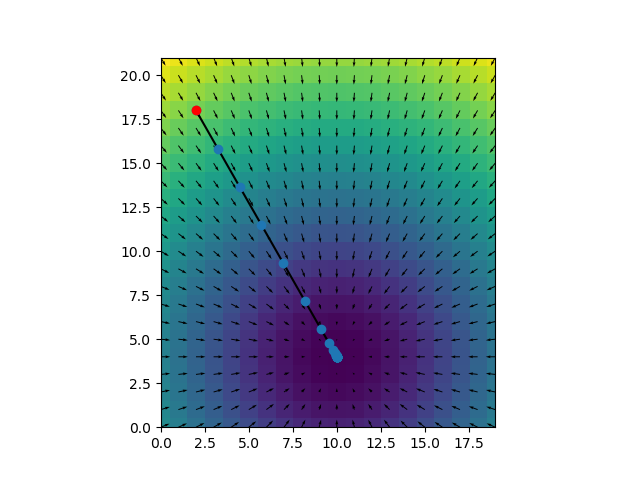

<IPython.core.display.Javascript object>


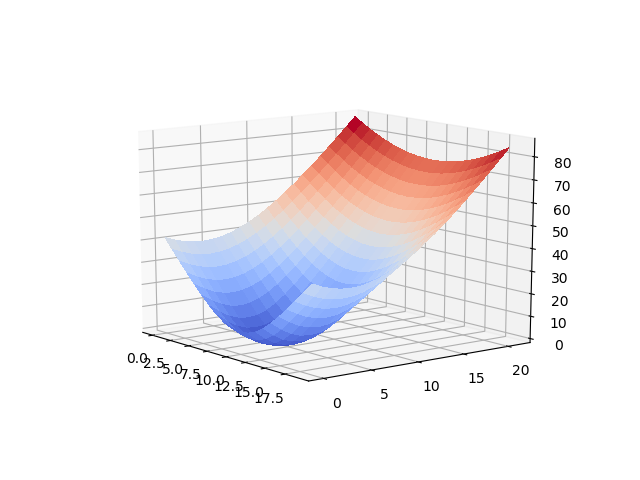

In [6]:
# Goal
qf = np.array([10., 4.])
# Grid
xv = np.arange(0,20,1); yv = np.arange(0,22,1); x, y = np.meshgrid(xv, yv)
# Parameters
d = 2
# Calculate attractive potential
Utot = np.zeros(x.shape); ftot = np.zeros((x.shape[0], x.shape[1], 2))
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        U, f = attractive_pot(np.array([x[i,j], y[i,j]]), qf, d)
        Utot[i,j] = U
        ftot[i,j,:] = f
# Graph
plt.figure()
plt.imshow(Utot); plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
# Starting point
pi = np.array([2., 18.])
traj = pi
for i in range(40):
    U, f = attractive_pot(pi, qf, d)
    pi = pi + 0.5*f
    traj = np.vstack([traj, pi])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.plot(traj[:,0], traj[:,1], 'k'); plt.plot(traj[:,0], traj[:,1], 'o'); plt.plot(traj[0,0], traj[0,1], 'ro')
# Plot
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, Utot, cmap=cm.coolwarm, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
plt.show()

## Campo Potencial Repulsivo: Un solo obstáculo

<IPython.core.display.Javascript object>


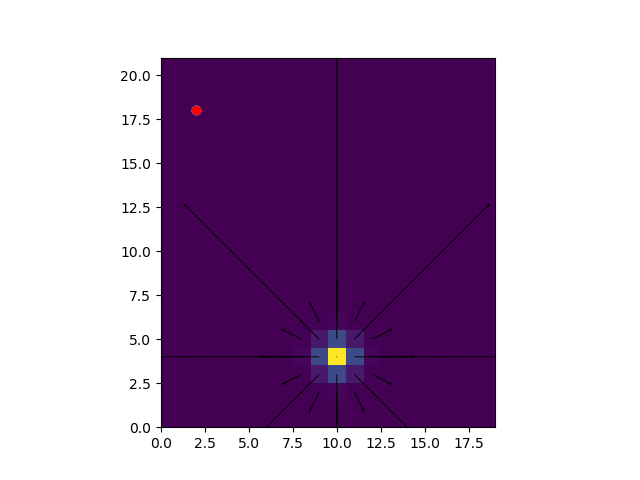

<IPython.core.display.Javascript object>


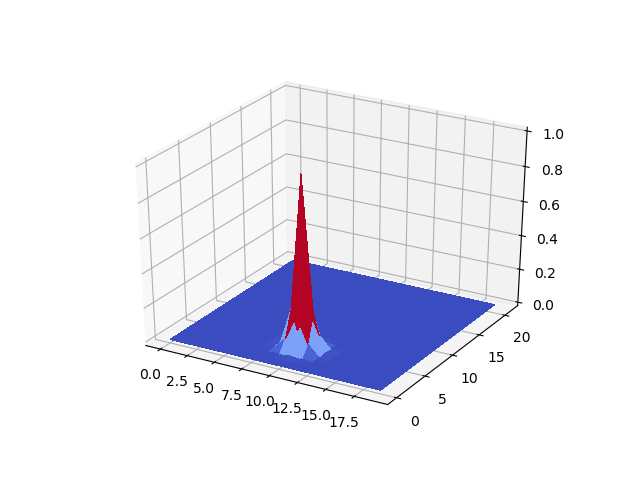

In [11]:
# Obstacle
qobst = np.array([10., 4.])
# Grid
xv = np.arange(0,20,1); yv = np.arange(0,22,1); x, y = np.meshgrid(xv, yv)
# Parameters
rho = 3
# Calculate attractive potential
Utot = np.zeros(x.shape); ftot = np.zeros((x.shape[0], x.shape[1], 2))
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        U, f = repulsive_pot(np.array([x[i,j], y[i,j]]), qobst, rho)
        Utot[i,j] = U
        ftot[i,j,:] = f
plt.figure()
plt.imshow(Utot); plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
# Starting point
pi = np.array([2., 18.])
traj = pi
for i in range(40):
    U, f = repulsive_pot(pi, qobst, rho)
    pi = pi + 0.5*f
    traj = np.vstack([traj, pi])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.plot(traj[:,0], traj[:,1], 'k'); plt.plot(traj[:,0], traj[:,1], 'o'); plt.plot(traj[0,0], traj[0,1], 'ro')
# Plot
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, Utot, cmap=cm.coolwarm, rstride=1, cstride=1,
                           linewidth=0, antialiased=False)
plt.show()


## Campo Potencial Repulsivo: Varios obstáculos

<IPython.core.display.Javascript object>


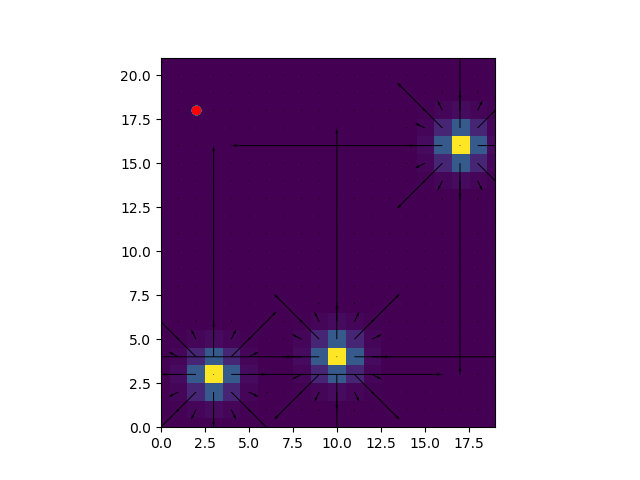

<IPython.core.display.Javascript object>


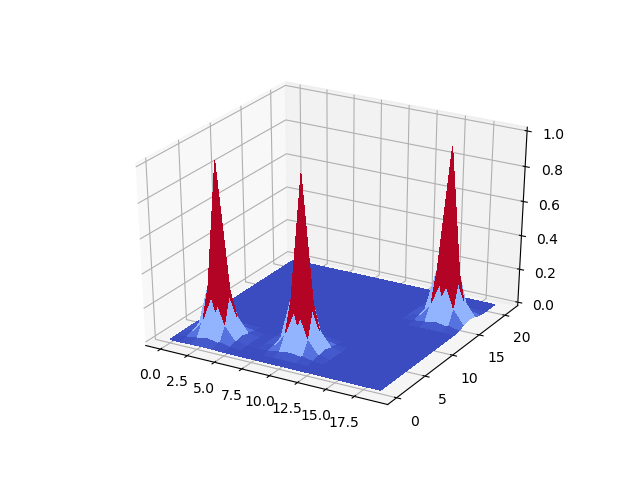

In [12]:
# Obstacles
qobst = np.array([[10., 4.],[3., 3.],[17.,16.]])
# Grid
xv = np.arange(0,20,1); yv = np.arange(0,22,1); x, y = np.meshgrid(xv, yv)
# Parameters
rho = 4
# Calculate attractive potential
Utot = np.zeros(x.shape)
ftot = np.zeros((x.shape[0], x.shape[1], 2))
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        U, f = repulsive_pots(np.array([x[i,j], y[i,j]]), qobst, rho)
        Utot[i,j] = U
        ftot[i,j,:] = f
plt.figure()
plt.imshow(Utot); plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
# Starting point
pi = np.array([2., 18.])
traj = pi
for i in range(40):
    U, f = repulsive_pots(pi, qobst, rho)
    pi = pi + 0.5*f
    traj = np.vstack([traj, pi])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.plot(traj[:,0], traj[:,1], 'k'); plt.plot(traj[:,0], traj[:,1], 'o'); plt.plot(traj[0,0], traj[0,1], 'ro')
# Plot
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, Utot, cmap=cm.coolwarm, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
plt.show()

## Campo Potencial Atractivo y Repulsivo

<IPython.core.display.Javascript object>


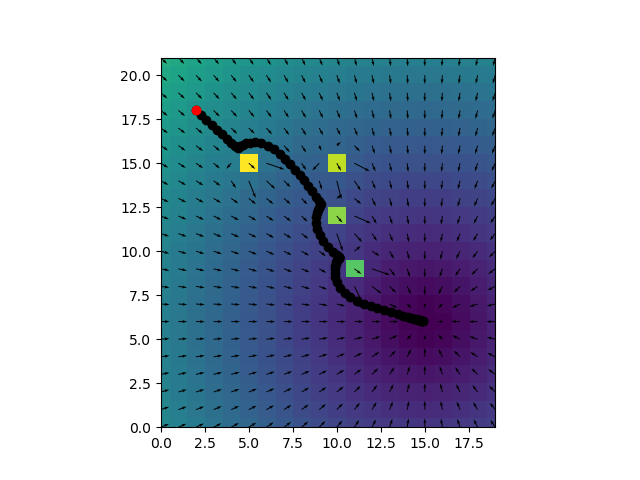

81


<IPython.core.display.Javascript object>


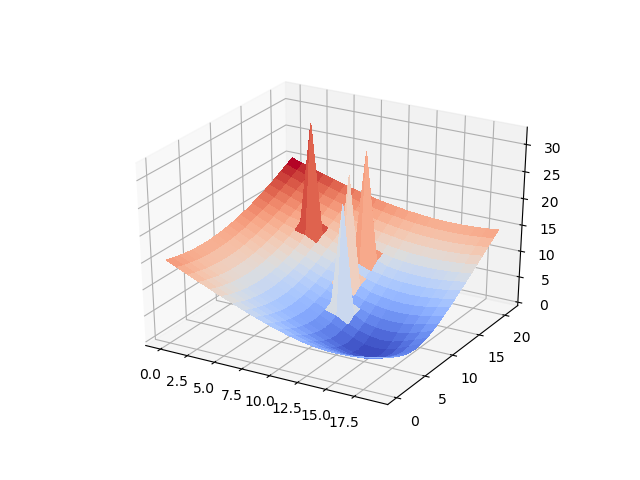

In [13]:
# Obstacles
qobst = np.array([[5., 15.],[10., 15.], [10., 12.,], [11., 9.]])
# Goal
qf = np.array([15., 6.])
# Grid
xv = np.arange(0,20,1); yv = np.arange(0,22,1); x, y = np.meshgrid(xv, yv)
# Parameters for repulsive field
rho = 3
eta = 2.0
Umax = 20
# Parameters for attractive field
zeta = 0.5
d = 2
# Calculate attractive potential
Utot = np.zeros(x.shape)
ftot = np.zeros((x.shape[0], x.shape[1], 2))
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        Ur, fr = repulsive_pots(np.array([x[i,j], y[i,j]]), qobst, rho, eta, Umax)
        Ua, fa = attractive_pot(np.array([x[i,j], y[i,j]]), qf, d, zeta)
        Utot[i,j] = Ur+Ua
        ftot[i,j,:] = fr+fa
plt.figure()
plt.imshow(Utot); plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
# Starting point
pi = np.array([2., 18.])
traj = pi
max_iter = 1000
for i in range(max_iter):
    Ur, fr = repulsive_pots(pi, qobst, rho, eta, Umax)
    Ua, fa = attractive_pot(pi, qf, d, zeta)
    pi = pi + 0.4*(fr+fa)
    traj = np.vstack([traj, pi])
    if (np.linalg.norm(pi-qf) < 0.1):
        break;
print(i)
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.plot(traj[:,0], traj[:,1], 'k'); plt.plot(traj[:,0], traj[:,1], 'ko'); plt.plot(traj[0,0], traj[0,1], 'ro')
# Plot
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, Utot, cmap=cm.coolwarm, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
plt.show()